# ASX vs Gold and Silver price during a downturn
This notebook explores the relative movement of ASX stocks (using ASX 200 index) vs Gold and silver over the last 30 years.

**Data collated from:**  
* Exchange rate data: rba.gov.au
* ASX data, Gold and Silver price data: marketindex.com.au  
* Recent Gold and Silver data: LBMA.org.uk  


In [1]:
import numpy as numpy
import pandas as pd
import indicators as idc
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('data/ASX_vs_Gold_vs_Silver.csv')
date_col = pd.to_datetime(df['Date'], dayfirst=True)
df['date'] = date_col.dt.date
df.set_index('date',inplace=True)

In [3]:
df['Stock to Gold ratio'] = df['Close']/df['Gold AUD']
df['Stock to Silver ratio'] = df['Close']/df['Silver AUD']

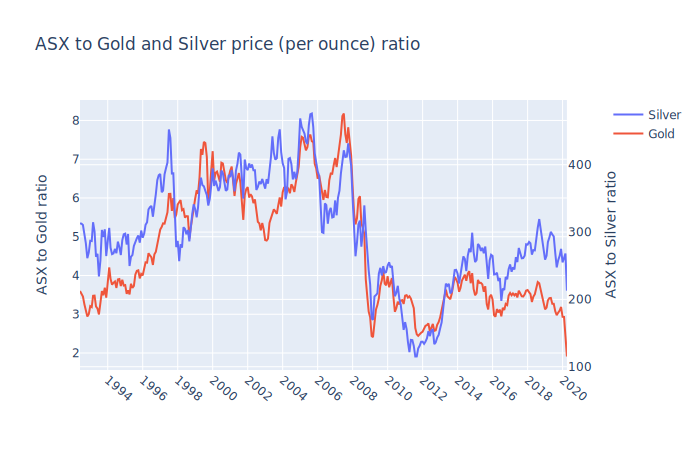

In [4]:
ratios_fig = make_subplots(specs=[[{"secondary_y": True}]])
ratios_fig.add_trace(go.Scatter(x=df.index, y=df['Stock to Silver ratio'],
                    mode='lines',
                    name='Silver'), secondary_y=True,)
ratios_fig.add_trace(
    go.Scatter(x=df.index, y=df['Stock to Gold ratio'],
                    mode='lines',
                    name='Gold'), secondary_y=False)
ratios_fig.update_yaxes(title_text="ASX to Gold ratio", secondary_y=False)
ratios_fig.update_yaxes(title_text="ASX to Silver ratio", secondary_y=True)
layout = go.Layout()
layout['title'] = 'ASX to Gold and Silver price (per ounce) ratio'
layout['xaxis'] = {"nticks":20, "tickangle":40}
ratios_fig['layout'].update(layout)
ratios_fig.show("svg")

## ASX 200 index stock price to Gold and Silver ratio
Precious metals are seen as safe havens when there's high inflation or downturn in the economy.  
In the graph above, we can see the relative price between ASX stocks and gold/silver.  
Gold's relative value to stocks peaked in 2009 during the GFC.  
At the point of writing (April 2020), Gold's relative value to stocks aleady exceeded that during the GFC. This suggests that there may not be a lot of room for Gold to gain values relative to stocks.  
Silver on the other hand, still has not reached its peak in 2011. This might suggest a buying opportunity.

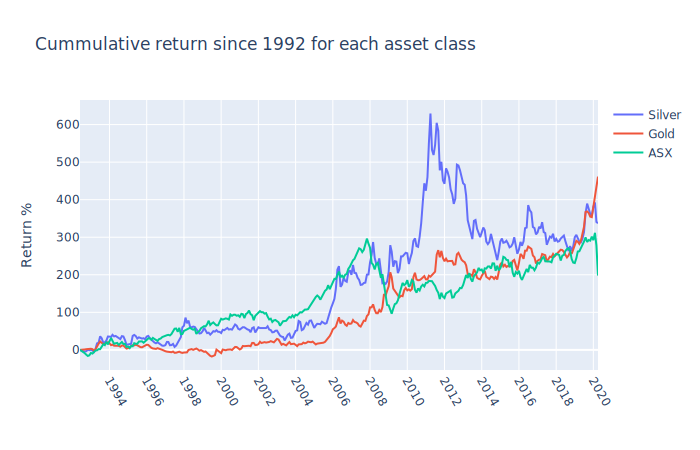

In [5]:
# Accummulative returns
silver_trace = go.Scatter(x=df.index, y=df['Silver Accum. Return %'], \
                    mode='lines',
                    name='Silver')
gold_trace = go.Scatter(x=df.index, y=df['Gold Accum. Return %'], \
                    mode='lines',
                    name='Gold')
asx_trace = go.Scatter(x=df.index, y=df['ASX accum. Return %'], \
                    mode='lines',
                    name='ASX')
traces = [silver_trace, gold_trace, asx_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Cummulative return since 1992 for each asset class', "yaxis_title": "Return %",
        "xaxis": {"nticks":20, "tickangle":60}
    }
)
fig_accum_r.show("svg")

## Cummulative return of the three asset classes from 1992
Over the last ~30 years, gold saw 450% return, compared to 350% for Silver and 300% for Australian stocks (prior to the Corona's downturn).  
This does not take into account devidend from stocks and holding cost for Gold and Silver.  

In [11]:
dfs = df[90:]
dfs['2000 acc return ASX'] = (dfs['Close'] - dfs['Close'][0])/dfs['Close'][0]*100
dfs['2000 acc return Silver'] = (dfs['Gold AUD'] - dfs['Gold AUD'][0]) /dfs['Gold AUD'][0]*100
dfs['2000 acc return Gold'] = (dfs['Silver AUD']-dfs['Silver AUD'][0])/dfs['Silver AUD'][0]*100
silver_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return Silver'], \
                    mode='lines',
                    name='Silver')
gold_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return Gold'], \
                    mode='lines',
                    name='Gold')
asx_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return ASX'], \
                    mode='lines',
                    name='ASX')
traces = [silver_trace, gold_trace, asx_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Cummulative return since 2000 for each assset class', "yaxis_title": "Return %",              "xaxis": {"nticks":20, "tickangle":40}
    }
)
fig_accum_r.show()


## Cummulative return of the three asset classes from 2000
Zooming into the last 20 years, silver significantly outperforms ASX and Gold in terms of growth as seen in the above chart.  
Next, we take a deeper look at each asset class.

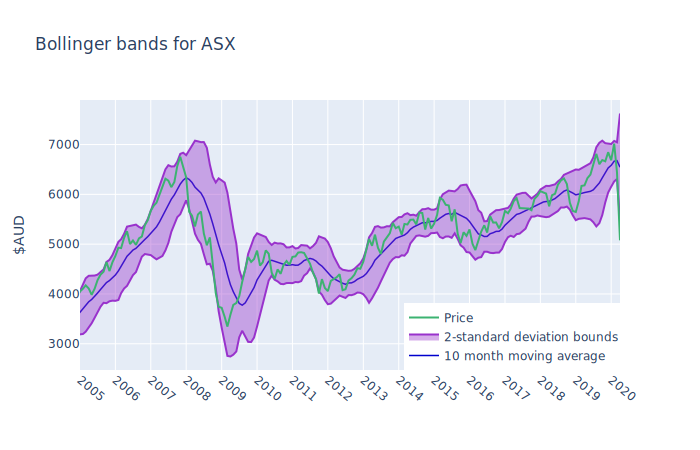

In [10]:
# ASX Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Close'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Close'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Close'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Close'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':"Bollinger bands for ASX", "yaxis_title": "$AUD",
        'xaxis': {'range':['2005-01-01','2020-04-01'], 'nticks':20, 'tickangle':40},
        'legend': {'x':0.6,'y':0}
    }
)
fig_accum_r.show("svg")

## ASX price movement
A widely used indicator for a stock's price movement is the Bollinger bands, where we show the running average plus/minus 2 standard deviations.  
The actual stock price is also shown, and it is expected that the stock price will tend to go back to the running average after it exceeds the upper or the lower band (deviate more than 2 standard deviations).  
As shown above, ASX stock price has already dropped below the lower band due to the recent Corona bear market.

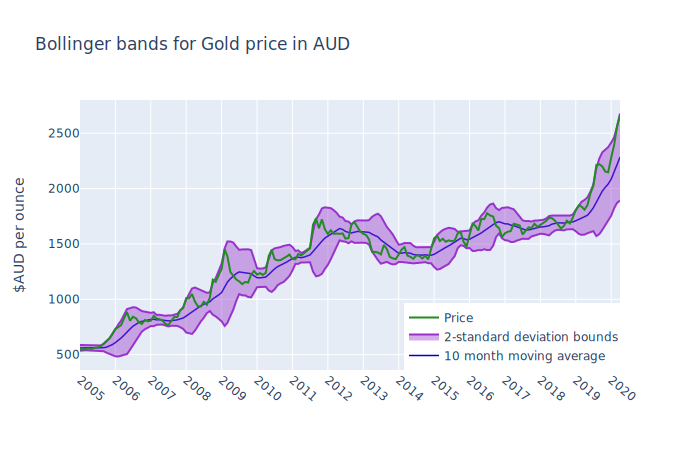

In [8]:
# Gold Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Gold AUD'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Gold AUD'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Gold AUD'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Gold AUD'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':"Bollinger bands for Gold price in AUD", "yaxis_title": "$AUD per ounce",
        'xaxis': {'range':['2005-01-01','2020-04-01'],  'nticks':20, 'tickangle':40},
        'legend': {'x':0.6,'y':0}
    }
)
fig_accum_r.show("svg")

## Gold price movement
As can be expected, when stock price drops, gold picks up, and it already exceeds the upper Bollinger band as seen above.

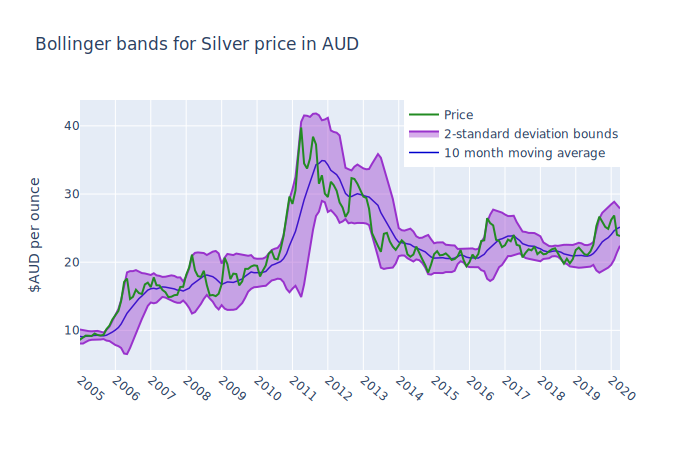

In [9]:
# Silver Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Silver AUD'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Silver AUD'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Silver AUD'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Silver AUD'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        "title":"Bollinger bands for Silver price in AUD", "yaxis_title": "$AUD per ounce",
        "xaxis": {'range':['2005-01-01','2020-04-01'],  "nticks":20, "tickangle":40},
        'legend': {'x':0.6,'y':1}
    }
)
fig_accum_r.show("svg")

## Silver price movement
Silver price on the other hand, is still very close to the moving average.  
If the past is a good idicator, we saw that the peak of Silver's relative value during the GFC lagged Gold's peak by 6 months.  
Therefore, it appears that Silver has not caught up to the growth in precious metal's price due to the recent Corona downturn, and is likely to do so in the near future.  

## End notes
We have only looked at the asset classes from a technical analysis's perspective and is therefore not a complete picture. But the trend indicates that the best time to buy into Gold for a quick return might have already past, and the next option is silver.  

It would be intersting to conduct the same analysis for properties as well.
